In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('transactions.csv')

In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [33]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
#Handling Missing and null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [25]:
#Unique values
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [37]:
df.shape

(6362620, 11)

In [41]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [111]:
counts = df['type'].value_counts()
print(counts)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Text(9.444444444444445, 0.5, 'No. of transaction')

<Figure size 640x480 with 0 Axes>

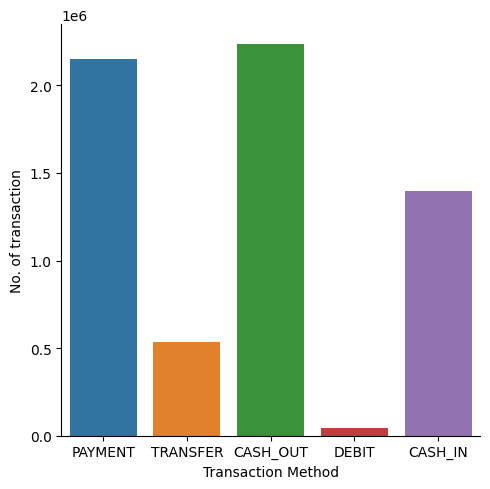

In [121]:
plt.figure(122)
sns.catplot(data=df, x="type", kind="count", hue="type")
plt.xlabel("Transaction Method")
plt.ylabel('No. of transaction')

In [ ]:
df.replace(to_replace=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],value=[5,4,3,2,1], inplace = True)

In [143]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,4,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,2,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,5,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,4,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,4,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,4,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,4,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [147]:
from sklearn.model_selection import train_test_split

In [159]:
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df.iloc[:,-2]

In [161]:
X.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig
0,4,9839.64,170136.00,160296.36
1,4,1864.28,21249.00,19384.72
2,2,181.00,181.00,0.00
3,5,181.00,181.00,0.00
4,4,11668.14,41554.00,29885.86
5,4,7817.71,53860.00,46042.29
6,4,7107.77,183195.00,176087.23
7,4,7861.64,176087.23,168225.59
8,4,4024.36,2671.00,0.00
9,1,5337.77,41720.00,36382.23


In [163]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [169]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [173]:
lr = LogisticRegression()

In [177]:
lr.fit(X_train,y_train) #fit both training data

LogisticRegression()

In [183]:
#Prediction
y_predict = lr.predict(X_test)

In [215]:
#Accuracy
print("Logistic Regression Score = ", accuracy_score(y_predict,y_test))

Logistic Regression Score =  0.9990397037698306


In [205]:
#Decison Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)

In [207]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [209]:
#Prediciton
y_pred = dt.predict(X_test)

In [217]:
print("Decision Tree score = " , accuracy_score(y_test, y_pred)*100)


Decision Tree score =  99.92872433054308
